## Medidas de tendência central

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('dados/dados.csv')

In [4]:
data.Renda.mean()

2000.3831988547631

In [5]:
data

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [6]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [7]:
df.Fulano.median()

8.0

In [8]:
beltrano_grades = df.Beltrano.sample(6, random_state = 101)
beltrano_grades.median()

6.25

In [9]:
df.Fulano.quantile()

8.0

In [10]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [11]:
data.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

## Renda report

In [12]:
import seaborn as sns

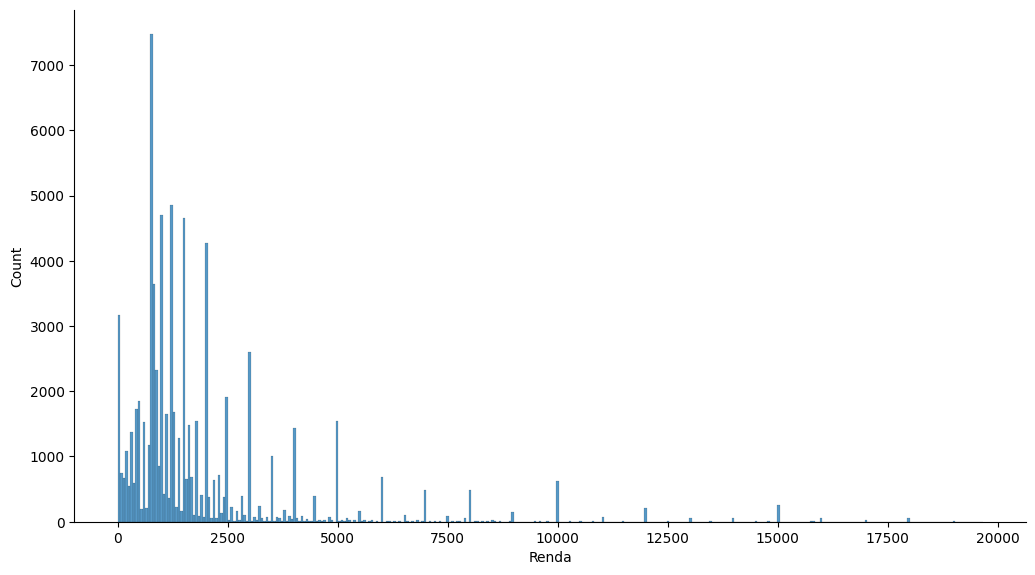

In [13]:
ax = sns.displot(data.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax;

## quartis, decis e percentis

In [14]:
data.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [15]:
data.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [16]:
data.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

C:\Users\mhenr\AppData\Local\Temp\ipykernel_15052\1270038839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.Idade,


<AxesSubplot: title={'center': 'Acumulative Frequency'}, xlabel='Year', ylabel='Acumulatived'>

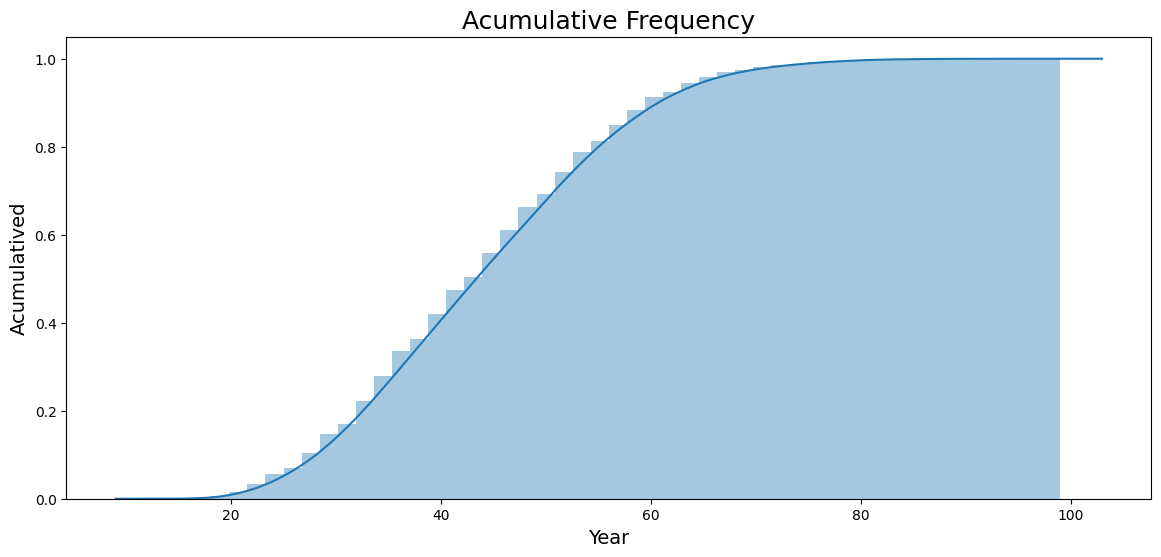

In [17]:
ax = sns.distplot(data.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Acumulative Frequency', fontsize=18)
ax.set_ylabel('Acumulatived', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax

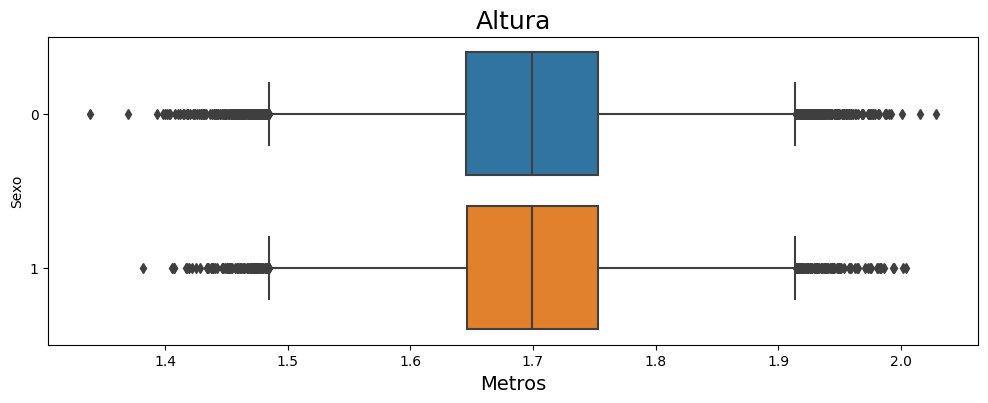

In [18]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = data, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax;

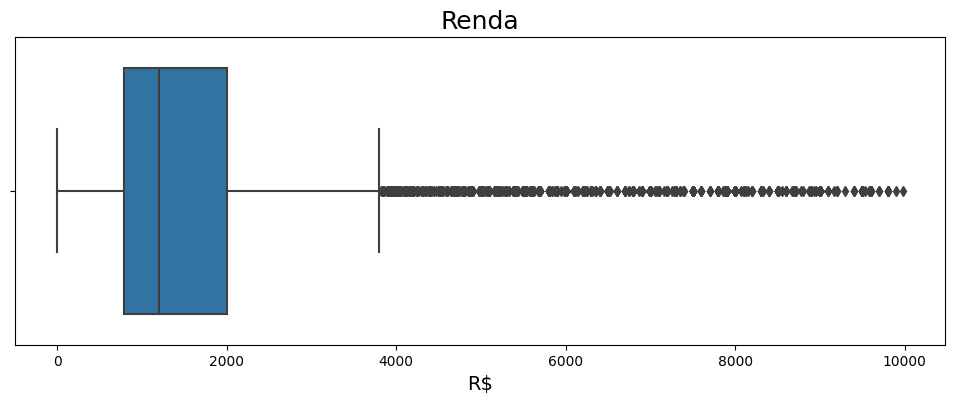

In [19]:
ax = sns.boxplot(x = 'Renda', data = data.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax;

In [20]:
df['Fulano'].mad()

C:\Users\mhenr\AppData\Local\Temp\ipykernel_15052\4261431300.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Fulano'].mad()


1.5510204081632648

In [21]:
df['Sicrano'].mad()

C:\Users\mhenr\AppData\Local\Temp\ipykernel_15052\2118181894.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['Sicrano'].mad()


0.4693877551020408

In [22]:
fulano_grades = df['Fulano']

In [23]:
df['Fulano'].var()

4.57142857142857

In [24]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset['Idade'].std()

14.184890239656813

In [25]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset.groupby(['Sexo']).std()

,Idade
Sexo,
H,11.898879
M,16.645320


In [26]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

pd.value_counts(
    pd.cut(x = data.Renda,
       bins = classes, labels = labels,
       include_lowest = True)
)

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64